# Plot the results for model comparison

In [23]:
float_numbers = [
    '4903052',
    '4903054',
    '4903058',
    '4903215',
    '4903217',
    '4903218',
    '4903220'
]
float_number = float_numbers[0]


# QUERY_STRATEGY = 'random'
QUERY_STRATEGY = 'uncertainty'

RESULT_PATH = f"../results/randomsplit/{float_number}/{QUERY_STRATEGY}"


In [24]:
COLOR_MAP = {
        'KNN': 'red',
        'XGBoost': 'green',
        'CatBoost': 'blue',
        'LightGBM': 'purple', 
        'KNN+XGBoost+CatBoost+LightGBM': 'teal',
    }

LINE_MAP = {
        'KNN': ':',
        'XGBoost': ':', 
        'CatBoost': ':',
        'LightGBM': ':', 
        'KNN+XGBoost+CatBoost+LightGBM': '-',
    }

========== Strategy:uncertainty   Initial:1000   K:1 ==========


<Figure size 1000x600 with 0 Axes>

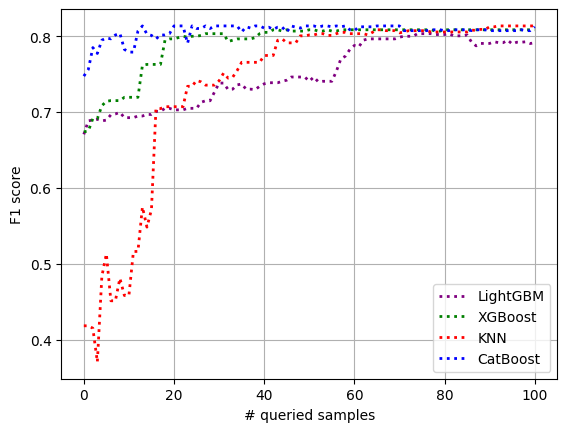

In [25]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

def extract_model_name(file_path):
    # Extracts the model name from a file path
    file_name = os.path.basename(file_path)
    return file_name.split('_')[0]

def group_files_by_parameters(directory):
    # Groups the files based on their n_initial and k values
    files = glob.glob(os.path.join(directory, '*_initial_*_k.csv'))
    grouped_files = {}
    
    for file_path in files:
        file_name = os.path.basename(file_path)
        n_initial = file_name.split('_')[1]
        k = file_name.split('_')[3]
        key = (n_initial, k)
        if key not in grouped_files:
            grouped_files[key] = []
        grouped_files[key].append(file_path)
    
    return grouped_files

def read_f1_scores(file_paths):
    # Reads the F1 scores from CSV files
    f1_scores = []
    
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        f1_scores.append(df['F1-score'].values)  # Assuming F1 Score is in the first column
    
    return f1_scores

def read_num_samples(file_path):
    # Reads the number of samples from a CSV file
    df = pd.read_csv(file_path)
    return df['num_samples'].values # Assuming num_samples is in the first column

def plot_f1_scores(grouped_files):
    # Plots the F1 scores for different models using the number of samples as the x-axis
    plt.figure(figsize=(10, 6))
    
    for key, file_paths in grouped_files.items():
        n_initial, k = key
        model_names = [extract_model_name(file_path) for file_path in file_paths]
        f1_scores = read_f1_scores(file_paths)
        num_samples = read_num_samples(file_paths[0])  # Assuming all files have the same num_samples
        plt.figure()
        for model_name, f1_score in zip(model_names, f1_scores):
            plt.plot(num_samples, f1_score, label=model_name, linewidth=2.0, color=COLOR_MAP[model_name], linestyle=LINE_MAP[model_name])

        plt.xlabel('# queried samples')
        plt.ylabel('F1 score')
        plt.legend(loc='lower right')
        plt.grid(True)


        figure_file = os.path.join(RESULT_PATH, f'F1_{n_initial}_initial_{k}_k.png')
        plt.savefig(figure_file, dpi=300, bbox_inches='tight')
        print(f'========== Strategy:{QUERY_STRATEGY}   Initial:{n_initial}   K:{k} ==========')
        plt.show()

# Example usage
directory = RESULT_PATH  # Replace with the actual directory path
grouped_files = group_files_by_parameters(directory)
plot_f1_scores(grouped_files)


In [26]:
grouped_files

{('1000',
  '1'): ['../results/randomsplit/4903052/uncertainty/LightGBM_1000_initial_1_k.csv', '../results/randomsplit/4903052/uncertainty/XGBoost_1000_initial_1_k.csv', '../results/randomsplit/4903052/uncertainty/KNN_1000_initial_1_k.csv', '../results/randomsplit/4903052/uncertainty/CatBoost_1000_initial_1_k.csv']}